# Caceria [D_S] Lord Mobile

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monstruos por niveles

Nivel | Puntaje
---   | ---
N1    | 1
N2    | 4
N3    | 16
N4    | 64

In [21]:
df = pd.read_csv('./output/output_cap_jul25.txt')
print(df)

          Nombre  N1  N2  N3  N4  Puntaje
0        juand98   9   1   6   1      171
1      carlosecf   2   0   0   0        2
2          adadi   2   0   0   0        2
3   lordkanino19   6  11   4   0       92
4          mmark   4   0   0   0        4
5          srcel  14   0   0   0       14
6       diofanto   6   2   0   0       10
7        sam1101   3   0   0   0        3
8       gadriels   4   0   0   0        4
9       deathiro   1   1   1   0       19
10        wirito   2   1   0   0        4
11   joserosario   1   1   0   0        3
12      hirowiro   3   0   0   0        3
13    n4versachi   3   3   0   0        9
14      migueldh   1   0   0   0        1
15           rpd   0   2   0   0        4
16         elver   5   0   0   0        5
17   eltemplari0   4   0   0   0        4
18     001padre2   2   0   0   0        2
19        nathy7   6   0   0   0        6
20    bri1mrcelo   1   0   0   0        1
21     jesus1479   1   0   0   0        1
22      001padre   1   0   0   0  

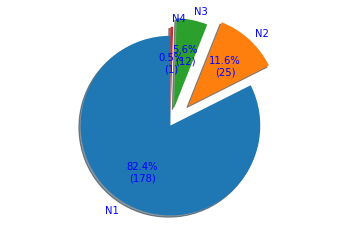

In [22]:
niveles = ['N1', 'N2', 'N3', 'N4']

general = df.loc[:,niveles].sum()

sizes = [15, 30, 45, 10]
explode = (0, 0.3, 0.2, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(general.values, explode=explode, labels=niveles, autopct=lambda pct: func(pct, general.values),
        shadow=True, startangle=90, textprops=dict(color="b"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

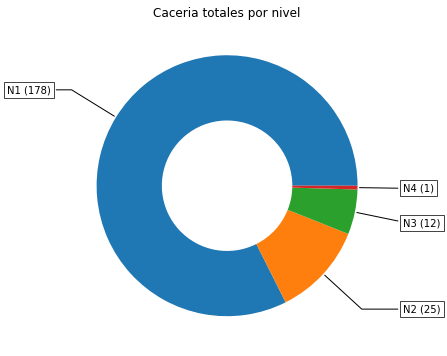

In [28]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

data = df.loc[:,niveles].sum()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate('%s (%i)'%(niveles[i],data[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Caceria totales por nivel")

plt.show()

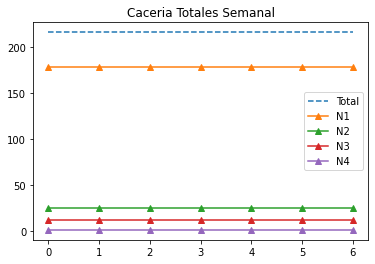

In [24]:
plt.plot(np.arange(7), np.ones(7)*general.sum(), '--', label='Total')
for nivel in niveles:
    plt.plot(np.arange(7),np.ones(7)*general.loc[nivel],'^-',label=nivel)
plt.title('Caceria Totales Semanal')
plt.legend()
plt.show()

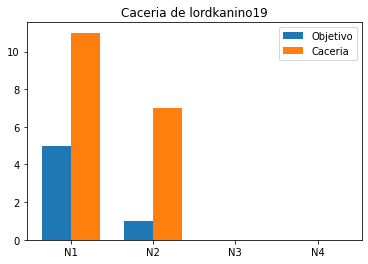

In [ ]:

objetivo = [5,1,0,0]
x = np.arange(len(niveles))
width = 0.35

datos = df.loc[22]

fig, ax = plt.subplots()

ax.bar(x - width/2, objetivo, width=width,label='Objetivo')
ax.bar(x + width/2, datos.loc[niveles].values,width=width, label='Caceria')
ax.set_title('Caceria de %s'%datos.loc['Nombre'])
ax.set_xticks(x)
ax.set_xticklabels(niveles)
ax.legend()

plt.show()

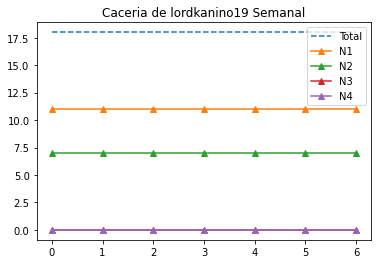

In [ ]:
plt.plot(np.arange(7), np.ones(7)*datos.loc[niveles].sum(), '--', label='Total')
for nivel in niveles:
    plt.plot(np.arange(7),np.ones(7)*datos.loc[nivel],'^-',label=nivel)
plt.title('Caceria de %s Semanal'%datos.loc['Nombre'])
plt.legend()
plt.show()